In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from IPython.display import display, HTML
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/Mandar/Pictures/Churn/churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# checking for levels in particular column
data.iloc[:,20].unique()

array([False,  True])

array([False,  True])

In [4]:
#removing state string and phone number which are irrelevant to research
data = data.drop(["state","phone number"], axis=1)

In [5]:
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# 4 column has yes and no 
# 5 column has yes and no 

for i in range(len(data.iloc[:,2])):
    if data.iloc[i,2] == 'no':
        data.iloc[i,2] = 0
    else:
        data.iloc[i,2] = 1
    if data.iloc[i,3] == 'no':
        data.iloc[i,3] = 0
    else:
        data.iloc[i,3] = 1

In [8]:
# 20 has True or false values

for i in range(len(data.iloc[:,2])):     
    if data.iloc[i,-1] == False:
        data.iloc[i,-1] = 0
    else:
        data.iloc[i,-1] = 1

In [9]:
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [10]:
from scipy.stats import chi2_contingency
for i in data:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(data['churn'],data[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)

account length
0.6859072560703084
area code
account length
0.6859072560703084
area code
0.9150556960243712
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09
number vmail messages
0.02038151196551766
total day minutes
0.9150556960243712
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09
number vmail messages
0.02038151196551766
total day minutes
2.0125191827544002e-09
total day calls
0.029139411038456495
total day charge
2.0125191827544002e-09
total day calls
0.029139411038456495
total day charge
2.0125191827544002e-09
total eve minutes
2.0125191827544002e-09
total eve minutes
0.38000144288534654
total eve calls
0.7116271234973077
total eve charge
0.38000144288534654
total eve calls
0.7116271234973077
total eve charge
0.3274489678253009
total night minutes
0.3274489678253009
total night minutes
0.7978235998907527
total night calls
0.5924167386770104
total night charge
0.7978235998907527
total night calls
0.5924167386770104
total n

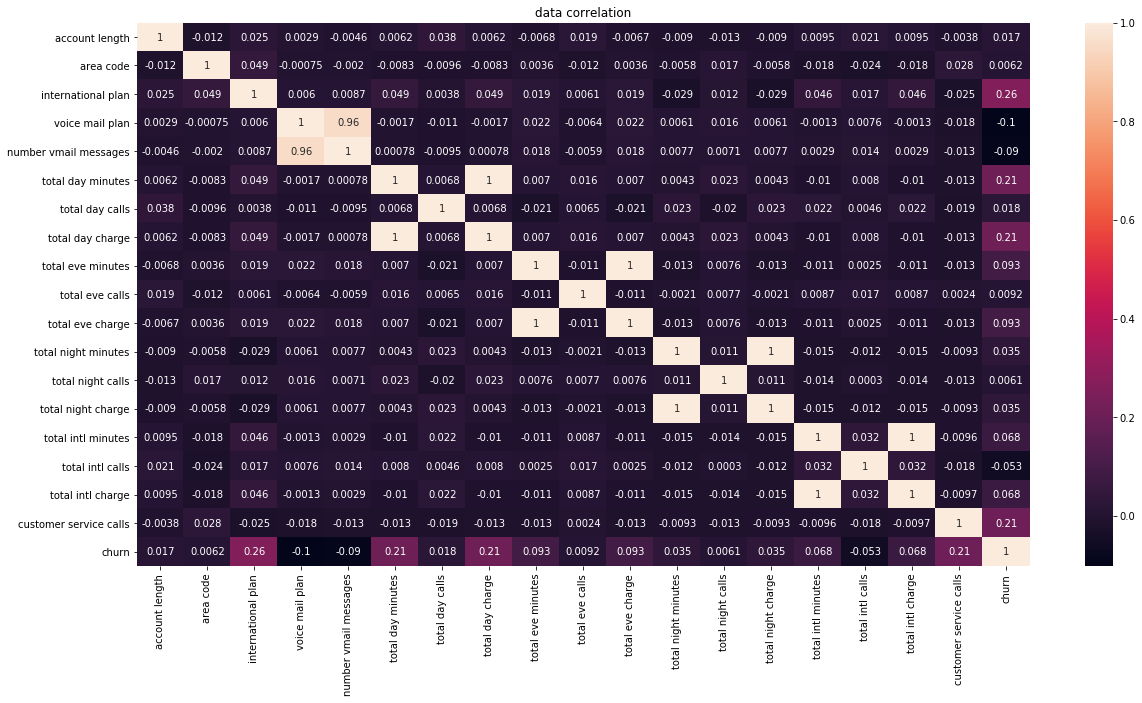

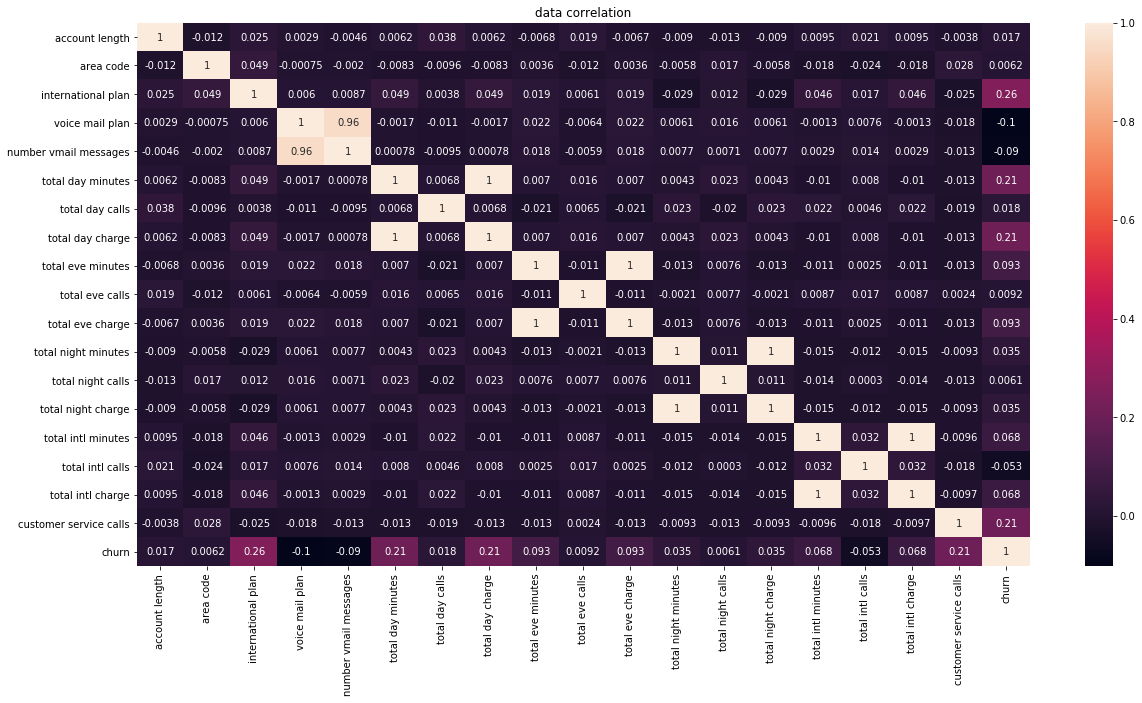

In [11]:
plt.subplots(figsize = (20,10))
plt.title("data correlation")
sns.heatmap(data.corr(), annot = True)

In [12]:
# checking for null value column wise
data.isnull().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [13]:
data.shape

(3333, 19)

(3333, 19)

Text(0.5, 1.0, 'Customer Churn Statistics')

Text(0.5, 1.0, 'Customer Churn Statistics')

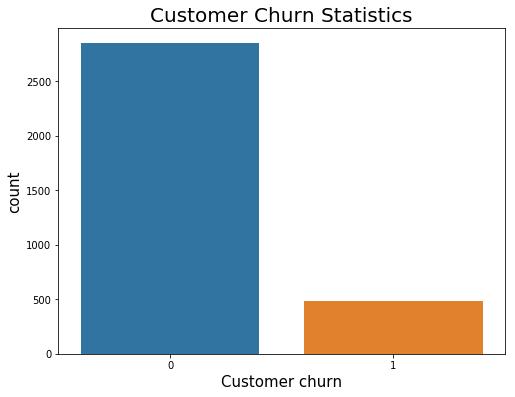

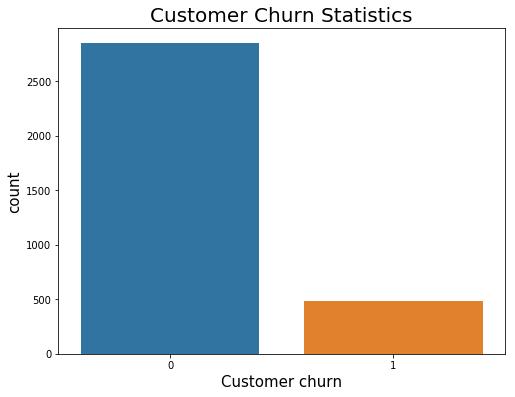

In [14]:
#Target Variable data distribution
plt.figure(figsize=(8,6))
sns.countplot(x='churn', data= data)
plt.xlabel('Customer churn', fontsize= 15)
plt.ylabel('count', fontsize= 15)
plt.savefig("churn_Vs_Count.png")
plt.title("Customer Churn Statistics",fontsize= 20)

In [15]:
# splitting data into features and target 
X = data.iloc[:,0:18]
Y = data.iloc[:,-1]

x_train = X.iloc[:round(len(X)*0.9),:]
y_train = Y.iloc[:round(len(X)*0.9)]
x_test = X.iloc[round(len(X)*0.9):,:]
y_test = Y.iloc[round(len(X)*0.9):]

In [16]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

0    2850
1     483
Name: churn, dtype: int64

In [17]:
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [18]:
from imblearn.over_sampling import SMOTE
Smo = SMOTE(random_state=101)
x_train_res, y_train_res = Smo.fit_sample(x_train,y_train)

In [19]:
(x_train_res.shape,y_train_res.shape)


((5128, 18), (5128,))

((5128, 18), (5128,))

In [20]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 2564
After OverSampling, counts of label '0': 2564
After OverSampling, counts of label '1': 2564
After OverSampling, counts of label '0': 2564


In [21]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

0    2850
1     483
Name: churn, dtype: int64

In [22]:

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
# logistic regression

lr = LogisticRegression() 
lr.fit(x_train,y_train) 
predicted_y = lr.predict(x_test)

C:\Users\Mandar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mandar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:

matrix = metrics.confusion_matrix(y_test,predicted_y) 
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Logistic Regression metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

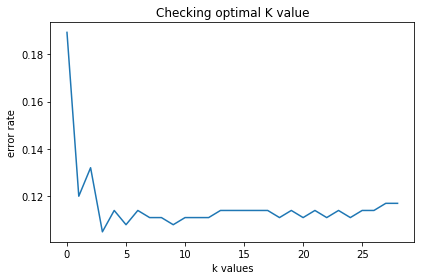

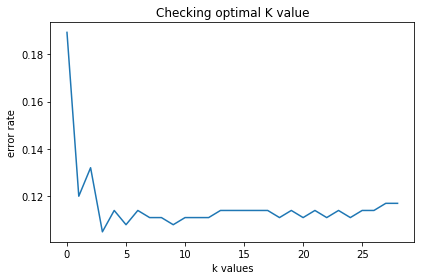

In [25]:
# KNN
# to select efficient k value
from sklearn.neighbors import KNeighborsClassifier
graph = []
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    graph.append(np.mean(y_predicted != y_test))
plt.plot(graph)
plt.title("Checking optimal K value")
plt.xlabel('k values')
plt.ylabel('error rate')
plt.tight_layout()

In [37]:
#k value seems to be stable after 22 
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train,y_train)
y_predicted = classifier.predict(x_test)
# metrics without KFOLD
matrix = metrics.confusion_matrix(y_test,y_predicted)
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('KNN metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

KNN metrics calculated 

Accuracy =  88.58858858858859  % 
Precision =  29.78723404255319  % 
Recall =  73.68421052631578  %
KNN metrics calculated 

Accuracy =  88.58858858858859  % 
Precision =  29.78723404255319  % 
Recall =  73.68421052631578  %


In [27]:
# Decision trees

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy').fit(x_train,y_train)
pred = dt.predict(x_test)

# metrics 
matrix = metrics.confusion_matrix(y_test,pred)
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Decision Trees metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Decision Trees metrics calculated 

Accuracy =  93.993993993994  % 
Precision =  80.85106382978722  % 
Recall =  77.55102040816327  %
Decision Trees metrics calculated 

Accuracy =  93.993993993994  % 
Precision =  80.85106382978722  % 
Recall =  77.55102040816327  %


In [28]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50 , random_state = 5).fit(x_train,y_train)
pred_rf = rf.predict(x_test)

# metrics without KFOLD
matrix = metrics.confusion_matrix(y_test,pred_rf) 
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Random forest metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Random forest metrics calculated 

Accuracy =  97.8978978978979  % 
Precision =  87.2340425531915  % 
Recall =  97.61904761904762  %
Random forest metrics calculated 

Accuracy =  97.8978978978979  % 
Precision =  87.2340425531915  % 
Recall =  97.61904761904762  %


In [29]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
model = nb.fit(x_train,y_train) 
predicted_results = nb.predict(x_test)

matrix = metrics.confusion_matrix(y_test,predicted_results)  
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100 
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100 
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100 
print('Naive Bayes metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')


Naive Bayes metrics calculated 

Accuracy =  85.88588588588588  % 
Precision =  55.319148936170215  % 
Recall =  50.0  %
Naive Bayes metrics calculated 

Accuracy =  85.88588588588588  % 
Precision =  55.319148936170215  % 
Recall =  50.0  %


In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model = ada.fit(x_train,y_train) 
predicted_results = ada.predict(x_test)

matrix = metrics.confusion_matrix(y_test,predicted_results)  
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100 
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100 
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100 
print('Ada Boost metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Ada Boost metrics calculated 

Accuracy =  89.7897897897898  % 
Precision =  44.680851063829785  % 
Recall =  72.41379310344827  %
Ada Boost metrics calculated 

Accuracy =  89.7897897897898  % 
Precision =  44.680851063829785  % 
Recall =  72.41379310344827  %


In [31]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
Using TensorFlow backend.


In [33]:
ann = Sequential()
ann.add(Dense(14,input_dim = 18,activation='relu'))
ann.add(Dense(9,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

ann.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

result = ann.fit(x_train,y_train,epochs=60,batch_size=9,validation_data=(x_test,y_test))

result

ann.summary() 

print('Training Loss = ',np.mean(result.history['loss'])*100,'\nTraining Accuracy = ',np.mean(result.history['acc'])*100)

print('Testing Loss = ',np.mean(result.history['val_loss'])*100,'\nTesting Accuracy = ',np.mean(result.history['val_acc'])*100)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Train on 3000 samples, validate on 333 samples
Epoch 1/60
Train on 3000 samples, validate on 333 samples
Epoch 1/60
3000/3000 [==============================] - 2s 738us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 2/60
3000/3000 [==============================] - 2s 738us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 2/60
3000/3000 [==============================] - 0s 135us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 3/60
3000/3000 [==============================] - 0s 144us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 4/60
3000/3000 [==============================] - 0s 131us/step - loss: 13.6254 - acc: 0.1453 - v

3000/3000 [==============================] - 1s 248us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 47/60
3000/3000 [==============================] - 1s 248us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 47/60
3000/3000 [==============================] - 1s 225us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 48/60
3000/3000 [==============================] - 1s 225us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 48/60
3000/3000 [==============================] - 1s 188us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 49/60
3000/3000 [==============================] - 0s 144us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 50/60
3000/3000 [==============================] - 0s 144us/step - loss: 13.6254 - acc: 0.1453 - val_loss: 13.6923 - val_acc: 0.1411
Epoch 50/60
3000/3000 [================